# Calcul d'un polygon moyen entre 2 polygones

> Nécessité de calculer un polygone "*moyen*" entre plusieurs polygones

## Première approche: distance minimale et interpolation entre 2 polygones
### Théorie

> *Base*: 2 polygones **A** et **B** avec **B** inclus dans **A**

> *Méthode*: Itération sur chaque paire de polygones pour trouver le polygone moyen (*cf. schéma ci-après*)

> *Libs*: ***Shapely*** avec la méthode ***[interpolate](http://toblerity.org/shapely/manual.html#object.interpolate)***

<img src="moyenne_iso.png" alt="moyenne_iso" width="800"/>

Ceci paraît simple à première vue mais il ne faut pas oublier les difficultés suivantes:
* Les éléments peuvent être des multi polygones (ensemble de polygones)
* Ces polygones/multi polygones peuvent contenir des *trous* (*holes*) qu'il faudra éventuellement prendre en compte:
    * vérifier que chaque paire d'*interior rings* et d'*exterior rings* comprend bien un polygon *within* un autre polygon
    * repérer les polygones les plus grands pour comparer les polygones *majeurs* entre eux et les exclure du calcul par la suite

### Test pratique
#### Cartes avec des exemples d'isochrones autour de Châtelet
> ***La légende est interactive, pour voir/cacher une couche, il suffit de cliquer dessus dans la légende***

In [1]:
import os

def get_files(path):
    files_list = []
    for root, dirs, files in os.walk(path):  
        for filename in files:
            files_list.append(os.path.join(root,filename))
            
    return files_list

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.tile_providers import STAMEN_TONER_BACKGROUND
from bokeh.models import GeoJSONDataSource
from bokeh.palettes import Viridis
import json

output_notebook()

# range bounds supplied in web mercator coordinates
p = figure()
p.width = 800
p.add_tile(STAMEN_TONER_BACKGROUND, alpha=0.2)

geojsons_path = "./variation_journee"
geojsons = get_files(geojsons_path)
colors = Viridis[len(geojsons)]

for i,geojson in enumerate(geojsons):
    name_legend = geojson.split("\\")[-1].split(".")[0]
    geojson = json.load(open(geojson))
    geo_source = GeoJSONDataSource(geojson=json.dumps(geojson))
    p.patches(
        xs='xs', 
        ys='ys', 
        line_color= colors[i], 
        fill_alpha=0.0, 
        line_alpha=0.8, 
        line_width=2, 
        source=geo_source, 
        legend=name_legend)

p.legend.click_policy="hide"

show(p)

Loading BokehJS ...

In [3]:
import sys
import os 
import geopandas as gpd
import itertools
from shapely.geometry import MultiPolygon

add_path = os.getcwd().replace('experiments', '')
sys.path.append(add_path)

import stats_functions as sf


def pairwise(iterable):
    """
    Source: https://stackoverflow.com/a/5434936
    """
    a, b = itertools.tee(iterable)
    next(b, None)
    
    return zip(a, b)  

multis = []

for geojson in geojsons:
    gdf = gpd.read_file(geojson)
    multis.append(MultiPolygon(gdf.geometry.values.tolist()))

middle = sf.GetMiddleMultiPoly(multis).iterate_for_middle()

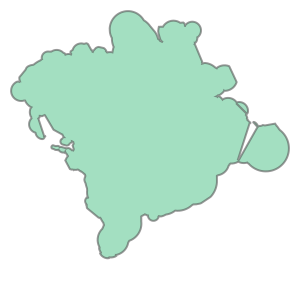

In [4]:
middle

## Seconde approche avec simplification préalable des multipolygones
### Simplifications Shapely/GeoPandas
#### Convex hull


#### Envelop

#### Simplify